The pond function simluates how many amoebae are left after 1 minute/cycle.

In [30]:
import numpy as np
import pandas as pd
def pond(k,p_die,p_doubled):
    '''
    k: number of amoebae
    p_die: probability that an amoeba dies
    p_doubled: probability that an amoeba doubles
    returns the number of amoebae left after one minute
    '''
    amoeba = np.random.rand(k) #assign each amoeba a random number 0-1
    died = (amoeba < p_die).astype(int).sum() #kill all amoebae under p_die
    doubled = (amoeba > 1-p_doubled).astype(int).sum() #double all amoebae greater than p_doubled
    survived = k - died - doubled #rest of the amoebae survive but don't duplicate. died and doubled are disjoint.
    return survived + 2*doubled

The simulate function runs through the pond function m times, each time updating the number of amoebae in the pond.

In [25]:
def simulate(k,m,p_die,p_doubled):
    '''
    k: starting number of amoebae
    m: number of cycles to simulate
    p_die: probability that an amoeba dies
    p_doubled: probability that an amoeba doubles
    returns number of amoebae after all m minutes
    '''
    while m > 0:
        k = pond(k,p_die,p_doubled)
        m -= 1
    return k

Simulate 1000 times, each time going for 50 "minutes".

In [26]:
amoebae = [simulate(1,50,0.25,0.5) for _ in range(1000)]

In [27]:
amoebae = np.asarray(amoebae)

Find out what percentage of ponds have 0 amoebae (extinction).

In [28]:
(amoebae == 0).mean()

0.502

Display histogram of amoebae counts.

In [31]:
df = pd.Series(amoebae)

<AxesSubplot:ylabel='Frequency'>

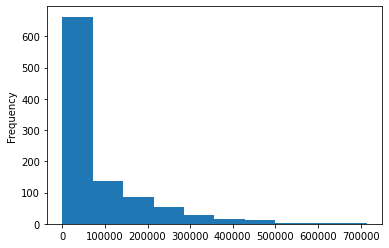

In [39]:
df.plot.hist(20)